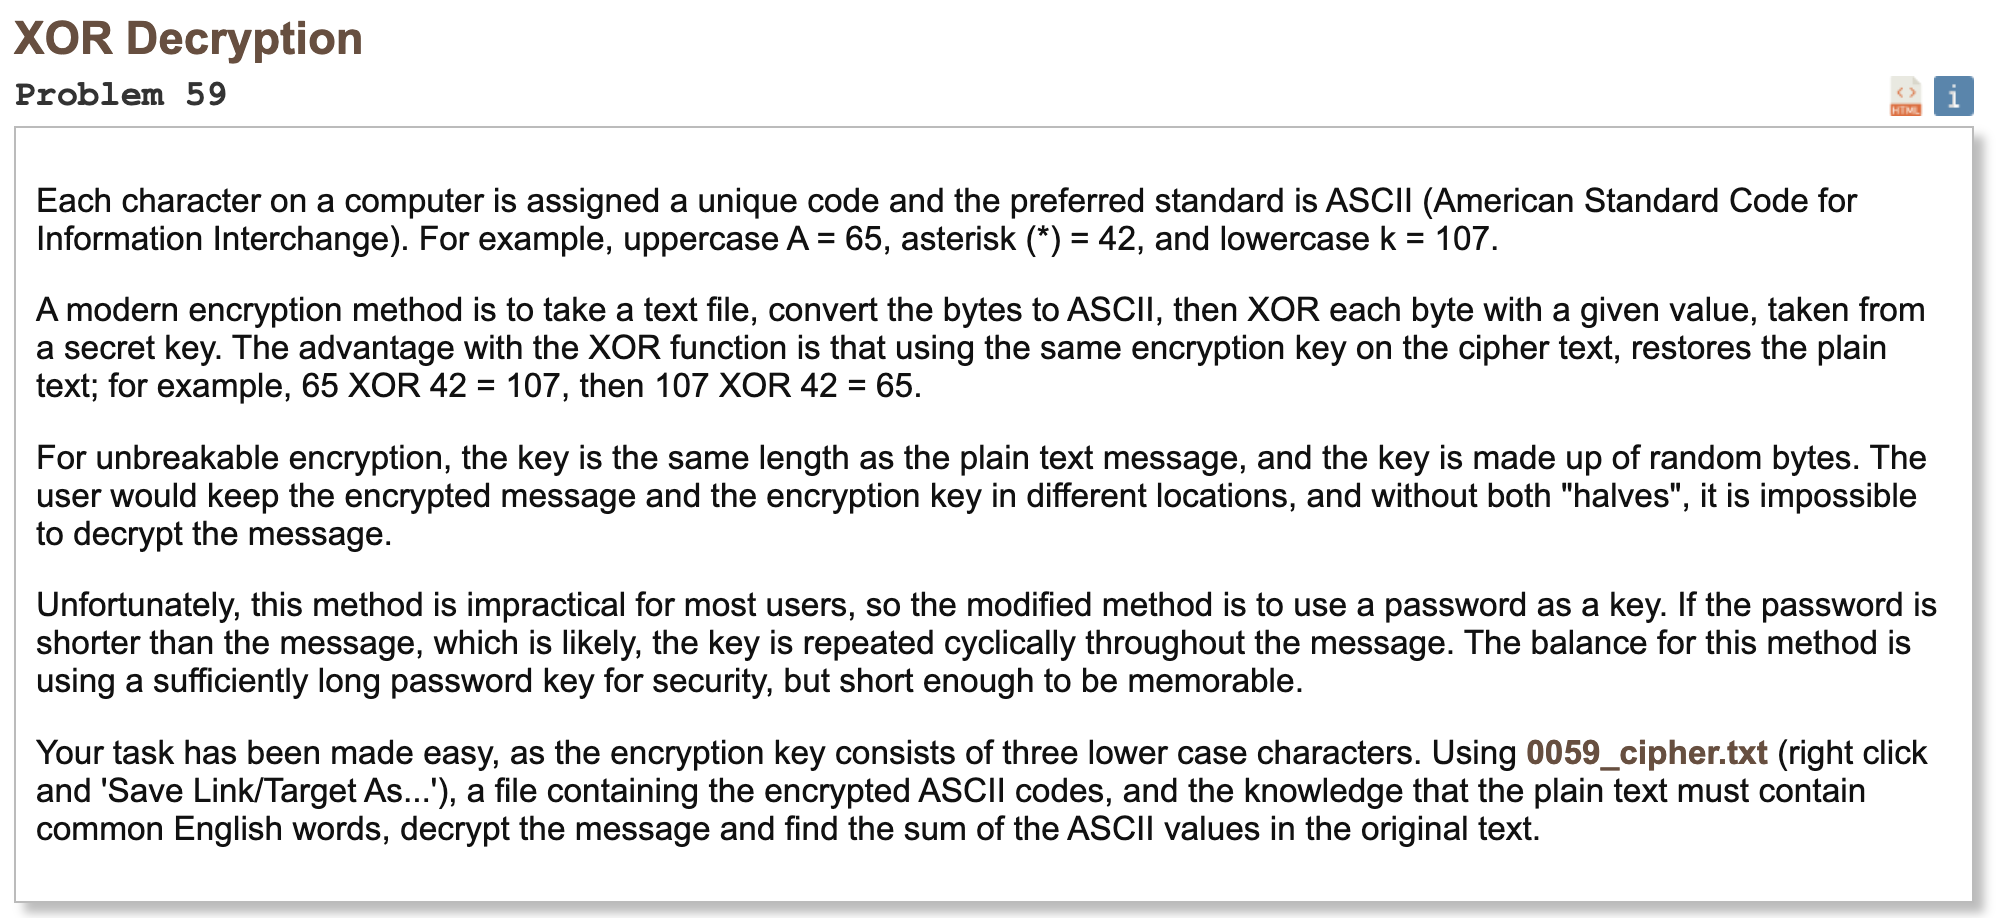

## Initial approach

Double check the problem

In [1]:
if "A"==chr(65) and "*"==chr(42) and "k"==chr(107):
    print(True)

True


Modern method: 

* take a text (list of numbers)
* convert the bytes to ascii
* XOR each byte with a given value taken from a secret key

Target:   

* find key
* solve the text (numbers list) with the key
* find ascii value sum of all characters in the text

Make a list from all numbers given in the txt file

In [2]:
with open("0059_cipher.txt", "r") as file:
    content = file.read()
    numbers = [int(n) for n in content.strip().split(",")]

len(numbers)

1455

Store all combinations of 3 letters in a list

In [3]:
keys = list()
letters = "abcdefghijklmnopqrstuvwxyz"

for a in letters:
    for b in letters:
        for c in letters:
            keys.append(a+b+c)

print("There are",len(keys),"combinations.")
print("Example:",keys[0:10])

There are 17576 combinations.
Example: ['aaa', 'aab', 'aac', 'aad', 'aae', 'aaf', 'aag', 'aah', 'aai', 'aaj']


## XOR Operation Explained

In [4]:
numbers[0:10]

[36, 22, 80, 0, 0, 4, 23, 25, 19, 17]

First number is 36.

In [5]:
number = 36
letter = "a"
print("ord(letter)", ord(letter))

ord(letter) 97


In [6]:
xor_result = 36 ^ 97
print("36 ^ 97 =", xor_result)

36 ^ 97 = 69


In [7]:
print("ASCII 69:",chr(xor_result))

ASCII 69: E


* 36 is the first encrypted number.
* "a" is a key letter we want to try.
* ord("a") gives 97 (ASCII value of “a”).
* 36 ^ 97 = 69 (XOR operation).
* chr(69) gives "E" — the decrypted letter.

## Try all 17.576 key combinations

In [8]:
def decrypt(numbers, key):
    decrypted_chars = []
    for i, num in enumerate(numbers):
        key_index = i % len(key)
        key_char = key[key_index]
        key_value = ord(key_char)
        decrypted_value = num ^ key_value
        decrypted_char = chr(decrypted_value)
        decrypted_chars.append(decrypted_char)
    return ''.join(decrypted_chars)

Try most frequent english words such as

* the
* and
* for
* of
* to
* ...

The goal is to confirm that the text is proper English.

In [9]:
for key in keys:
    text = decrypt(numbers, key)
    if ' the ' in text and ' and ' and ' for ' and ' of ' and ' to ' in text:
        print("Key:", key)
        print(text[:500])
        break

Key: exp
An extract taken from the introduction of one of Euler's most celebrated papers, "De summis serierum reciprocarum" [On the sums of series of reciprocals]: I have recently found, quite unexpectedly, an elegant expression for the entire sum of this series 1 + 1/4 + 1/9 + 1/16 + etc., which depends on the quadrature of the circle, so that if the true sum of this series is obtained, from it at once the quadrature of the circle follows. Namely, I have found that the sum of this series is a sixth part


Awesome! 

Now compute the sum of all ascii values.

In [10]:
ascii_sum = sum(ord(c) for c in text)
print("Result:",ascii_sum)

Result: 129448
